<a href="https://colab.research.google.com/github/Otieno-clinton/Otieno-clinton/blob/main/ABTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as norm
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df_ab_test = pd.read_csv('/content/ab_test_click_data (1).csv')
print(df_ab_test.head(10))
print(df_ab_test.tail())
# print(df_ab_test.info())
# print(df_ab_test.describe())


   user_id  click group            timestamp
0        1      1   exp  2024-01-01 00:00:00
1        2      0   exp  2024-01-01 00:01:00
2        3      1   exp  2024-01-01 00:02:00
3        4      0   exp  2024-01-01 00:03:00
4        5      1   exp  2024-01-01 00:04:00
5        6      0   exp  2024-01-01 00:05:00
6        7      1   exp  2024-01-01 00:06:00
7        8      1   exp  2024-01-01 00:07:00
8        9      0   exp  2024-01-01 00:08:00
9       10      0   exp  2024-01-01 00:09:00
       user_id  click group timestamp
19995    19996      1   con       NaN
19996    19997      1   con       NaN
19997    19998      1   con       NaN
19998    19999      0   con       NaN
19999    20000      1   con       NaN


In [ ]:
print(df_ab_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    20000 non-null  int64 
 1   click      20000 non-null  int64 
 2   group      20000 non-null  object
 3   timestamp  10000 non-null  object
dtypes: int64(2), object(2)
memory usage: 625.1+ KB
None


In [ ]:
df_ab_test.shape

(20000, 4)

In [ ]:
df_ab_test.isnull().sum()

,0
user_id,0
click,0
group,0
timestamp,10000


In [ ]:
print(df_ab_test.describe())

            user_id         click
count  20000.000000  20000.000000
mean   10000.500000      0.405250
std     5773.647028      0.490953
min        1.000000      0.000000
25%     5000.750000      0.000000
50%    10000.500000      0.000000
75%    15000.250000      1.000000
max    20000.000000      1.000000


In [ ]:
print(df_ab_test.groupby("group").sum("click"))

         user_id  click
group                  
con    150005000   1989
exp     50005000   6116


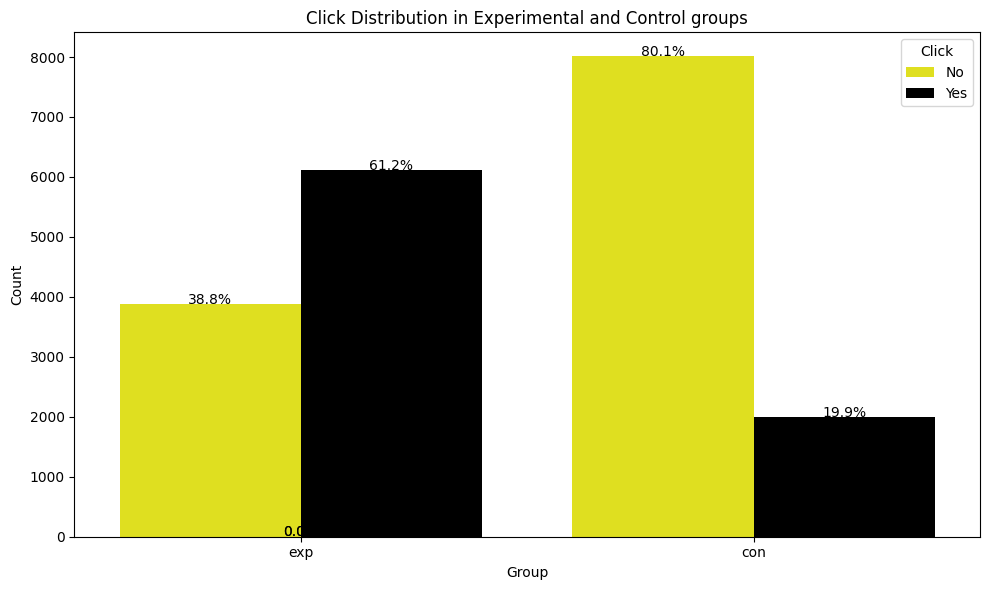

In [ ]:
#custom palette for yellow and black
palette = {0: 'yellow', 1: 'black'} #Assuming 0 is for no-click and 1 for click

#ploting the click distribution for each group with the cusom colors
plt.figure(figsize= (10, 6)) # Changed 'figuresize' to 'figsize'
ax = sns.countplot(x= 'group', hue= 'click', data= df_ab_test, palette= palette)
plt.title('Click Distribution in Experimental and Control groups')
plt.xlabel('Group')
plt.ylabel('Count')
plt.legend(title='Click', labels= ['No','Yes'])

#calculting the percentages and annotate the bars
Group_counts = df_ab_test.groupby(['group']).size() # This was previously assigned to 'group_counts'
group_click = df_ab_test.groupby(['group', 'click']).size().reset_index(name= 'count')

for p in ax.patches:
    height = p.get_height()
    #find the group and click type for the current bar
    group = 'exp' if p.get_x() <0.5 else 'con'
    click = 1 if p.get_x() % 1 >0.5 else 0
    total = Group_counts.loc[group] # Changed 'Group' to 'group'
    percentage = 100 * height / total
    ax.text(p.get_x() + p.get_width() / 2, height + 5, f'{percentage:.1f}%',ha="center", color='black', fontsize= 10) # Changed '.if' to '.1f' in f-string
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files

!ls

'ab_test_click_data (1).csv'   sample_data


In [ ]:
files.download('ab_test_click_data (1).csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>